In [1]:
import math
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/data/train.csv')
df.tail(5)

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male
350,9904,largeintestine,HPA,3000,3000,0.4,4,1009165 7 1012149 28 1015140 38 1018127 51 102...,84.0,Male


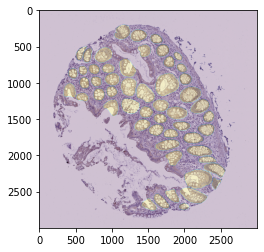

In [9]:
img = np.array(Image.open('/data/train_images/9904.tiff'))
mask = np.array(Image.open('/data/train_masks/9904.png'))
plt.imshow(img)
plt.imshow(mask, alpha=0.2)
plt.show()

In [7]:
def tile_image(img: Image, tid_w: int, tid_h: int, tile_size) -> Image:
    img = np.array(img)
    img = img[tid_h*tile_size:(tid_h+1)*tile_size, tid_w*tile_size:(tid_w+1)*tile_size, ...]
    if img.shape[:2] != (tile_size, tile_size):
        img_ = np.copy(img)
        if len(img.shape)==3:
            img = np.zeros([tile_size, tile_size, img.shape[2]], dtype=img.dtype)
            img[:img_.shape[0], :img_.shape[1], ...] = img_
        elif len(img.shape)==2:
            img = np.zeros([tile_size, tile_size], dtype=img.dtype)
            img[:img_.shape[0], :img_.shape[1]] = img_
    return img

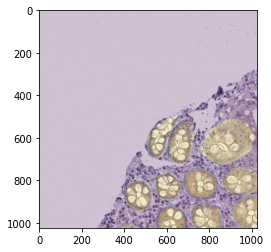

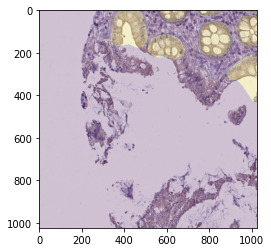

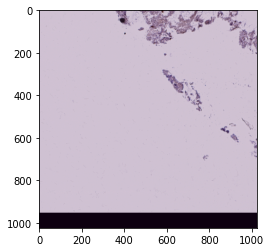

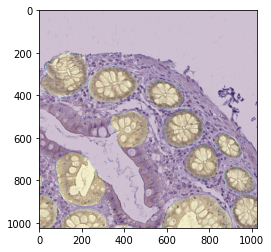

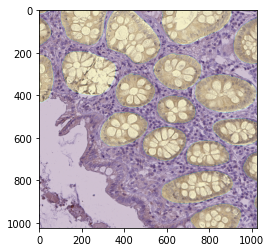

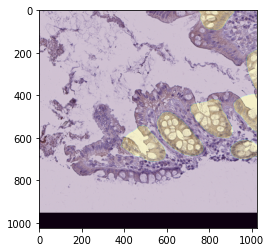

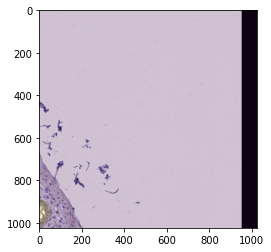

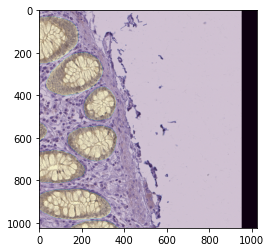

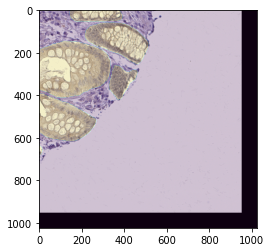

In [10]:
tile_size =1024
h, w, _ = img.shape
n_tile_w = math.ceil(w / tile_size)
n_tile_h = math.ceil(h / tile_size)
n_tile_w, n_tile_h

for i in range(n_tile_h):
    for j in range(n_tile_w):
        tiled_img = tile_image(img, i, j, tile_size)
        tiled_mask = tile_image(mask, i, j, tile_size)
        plt.imshow(tiled_img)
        plt.imshow(tiled_mask, alpha=0.2)
        plt.show()